---
# Comparison & Classification Analysis in Microbiome Research

### Questions:
- Univariate analyses: Are there any individual microbial taxa or that significantly differ between groups?
- Multivariate analyses: How do the microbial communities differ across groups as a whole, considering the interactions between multiple taxa?
- LEfSe (Linear Discriminant Analysis Effect Size): Which microbial taxa are most differentially abundant between groups, and how strong is their effect size in class separation?
- Random Forest: Can we predict group membership (e.g., male vs female) based on the microbiome composition?

### Objectives:
- Univariate analyses: Identify significant differences in microbial abundance between predefined groups.
- Multivariate analyses: Identify overall patterns in microbiome composition across groups using all or a subset of features.
- LEfSe (Linear Discriminant Analysis Effect Size): Discover biomarkers (features) that discriminate between groups.
- Random Forest: Build a predictive model to classify microbiome samples based on their taxonomic composition or other features. Identify the most important microbial features driving classification performance.

### Keypoints:
- Univariate analyses:  Univariate analysis focuses on individual features and doesn’t capture interactions between features, which might be important in complex microbiome data.
- Multivariate analyses: We can explore relationships and differences between groups in a multivariate space. This will reduce the dimensionality of high-dimensional data (many taxa) to uncover the main axes of variation. 
- LEfSe (Linear Discriminant Analysis Effect Size): LEfSe combines Kruskal-Wallis test (to find features that significantly differ between groups) with Linear Discriminant Analysis (LDA) (to rank features by their effect size and ability to separate groups),
- Random Forest: Random Forest (RF) is a powerful machine learning algorithm used for classification tasks, particularly when there are many features and complex interactions.

---

## Getting Started

In [ ]:
# set the variables for your netid
netid = "NETID"

In [ ]:
# make a variable for the working directory
work_dir = "/xdisk/bhurwitz/bh_class/" + netid + "/exercises/15_comparisons"

### Comparison & Classification Analyses

In this exercise, we are going to explore Comparison & Classification Analyses in the Microbiome Analyst using four techniques:

* Univariate Analysis is useful for identifying individual features that are significantly different between groups, but it does not account for complex interactions between features.
* Multivariate Analysis is powerful for exploring patterns across multiple features, revealing overall community differences, and reducing dimensionality for easier visualization and interpretation.
* LEfSe is designed specifically for biomarker discovery, providing both statistical significance and effect size to identify features that best separate groups.
* Random Forest is ideal for predictive classification and can highlight the most important microbial features for distinguishing between groups, especially when dealing with complex, high-dimensional data. 

#### The Purpose of Comparison & Classification Analysis:

Univariate: Identifying individual features that are significantly different between groups. Statistical tests: Common tests include the t-test, Mann-Whitney U test, ANOVA, or Kruskal-Wallis test to compare microbial abundances across groups. Multiple comparison correction: Due to the large number of features (microbial taxa), apply corrections like Benjamini-Hochberg to control for false discovery rates (FDR). Effect size: In addition to p-values, calculating effect sizes (e.g., Cohen's d) helps understand the magnitude of differences in abundance.

Multivariate: Exploring patterns across multiple features, revealing overall community differences, and reducing dimensionality for easier visualization and interpretation. Explore relationships and differences between groups in a multivariate space.

LEfSe:
LEfSe is a non-parametric statistical method developed to identify microbial taxa that are significantly different between groups. LEfSe first uses the Kruskal–Wallis test to identify taxa whose relative abundances are significantly different between groups. LDA is then applied to taxa that meet the significance threshold to estimate their effect size. This approach outputs a ranked list of taxa based on their LDA scores. A significance level of P < 0.05 and an LDA score of 2 are often used to determine taxa that best characterize each phenotype. The original LEfSe implementation, which is available on the Huttenhower Galaxy (https://huttenhower.sph.harvard.edu/galaxy), considers the entire set of taxa (all taxonomic ranks) when performing LEfSe. In comparison, the MicrobiomeAnalyst implementation performs LEfSe only at the user’s specified taxonomic level. In addition, the original LEfSe implementation uses raw P values when determining significant taxa. The MicrobiomeAnalyst implementation provides users the option to use either raw or FDR-adjusted P value cutoffs.

Random Forests:
RF is a supervised machine-learning algorithm that has been applied to microbiome data for classification as well as to identify microbial taxa that differentiate between phenotypes. RF is well suited for large and noisy data such as those from the microbiome because it is able to identify non-linear relationships, deal with variable interactions, and is robust to overfitting. RF works by constructing multiple decision trees using a randomly selected subset of the training data. Each tree is formed by selecting at random, at each node, a small group of input features to split on. The class prediction is achieved via the majority vote from all trees. To evaluate the classification accuracy, 1/3 of samples are omitted during tree construction and are subsequently classified using the models to compute the out-of-bag or OOB error rates. The importance of a variable is calculated as the mean decrease in accuracy across all trees when the variable is shuffled.


# Let's try this out in Microbiome Analyst. 

Go through the same steps from the previous exercises with the example.biom file to get to the Analysis Overview step below. Go to the Comparison & Classification Section.

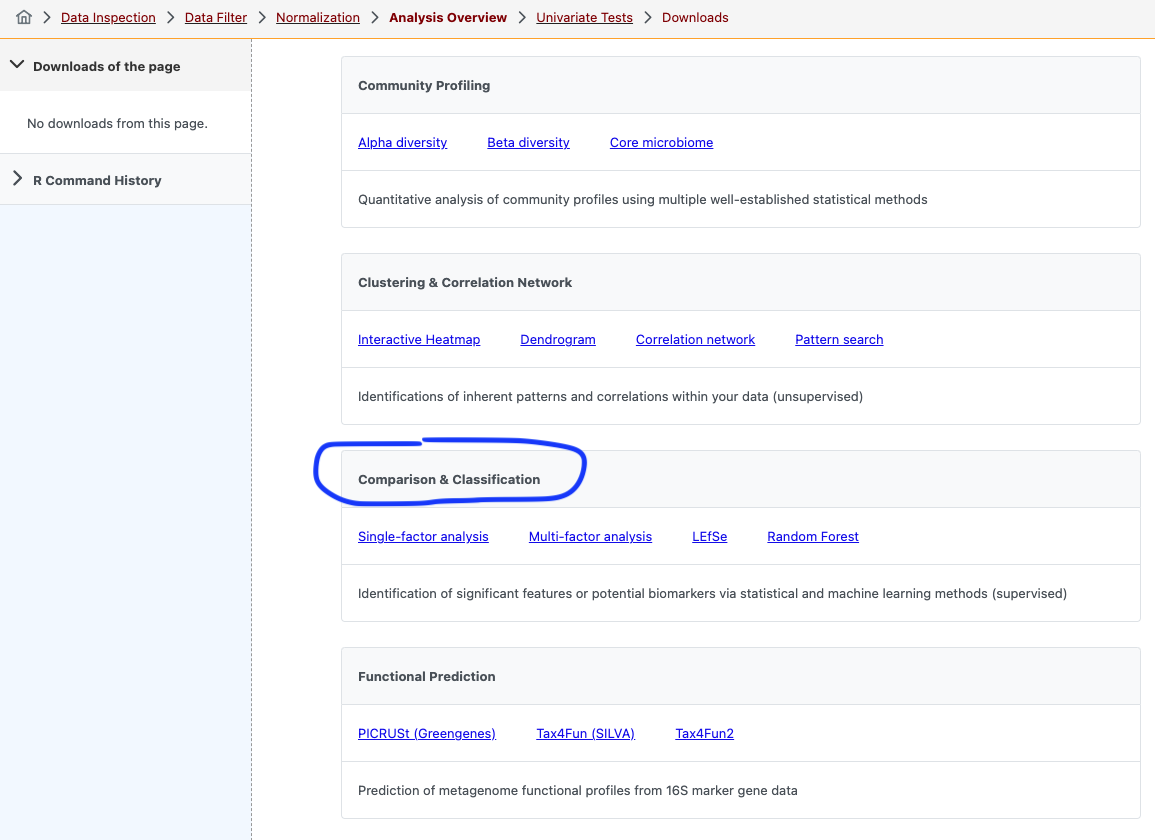

#### Step 1

Differential Abundance Analysis using classical univariate analysis. 

From the ‘Analysis Overview’ page and click ‘Single Factor Analysis’ in the Comparison & Classification Section. MicrobiomeAnalyst offers t-tests/ANOVA and their nonparametric counterparts. The results for all differential-abundance analyses follow the same layout. The top half of the page contains parameters with which users can customize their analyses, such as the taxonomic level, statistical method, and significance cutoff. 

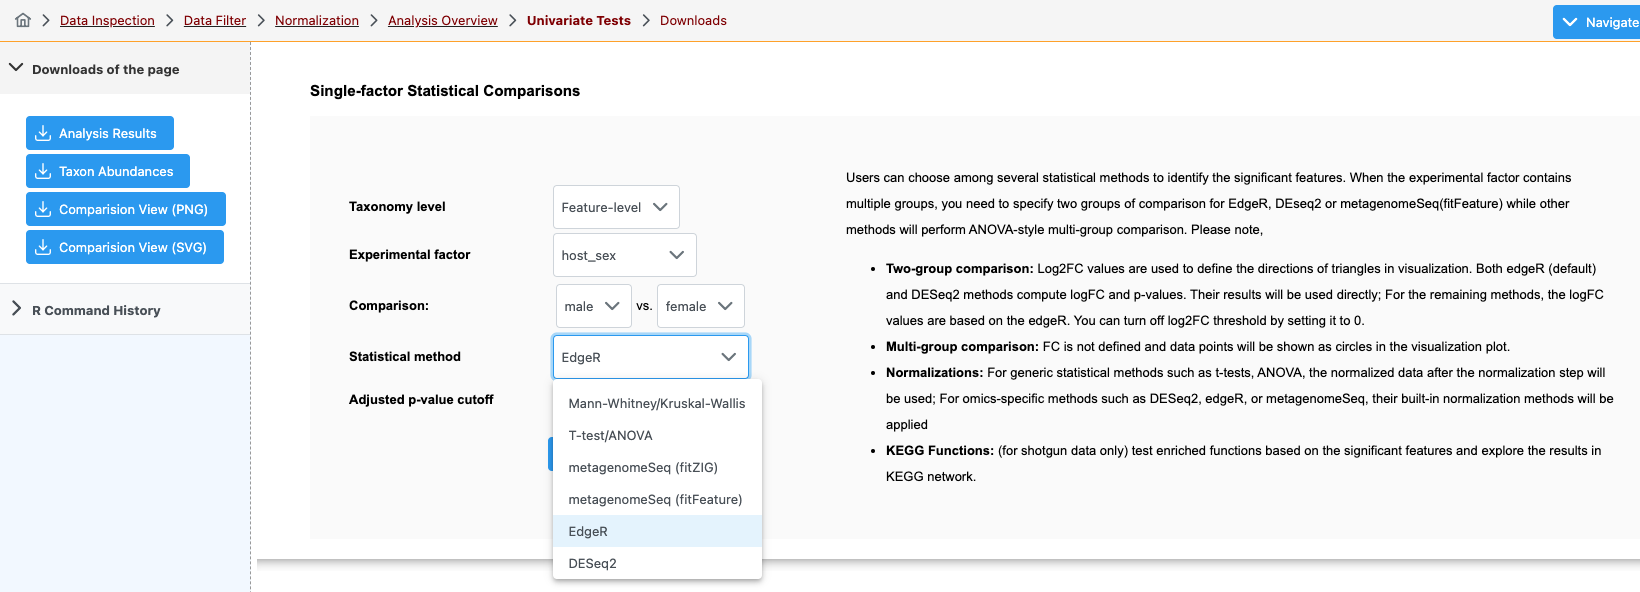


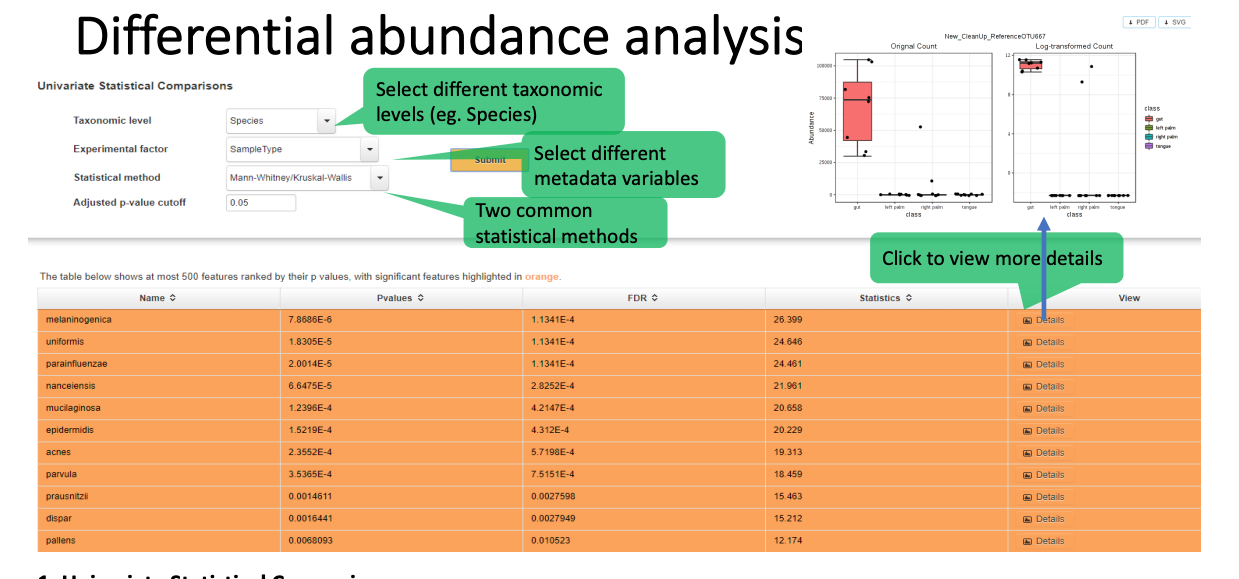

> ## Exercise: Univariate Comparisons Exploration
> Try using EdgeR to find features that are significantly different between female vs male babies. EdgeR was originally developed to identify significant features using methods developed for RNA-seq data analysis. 

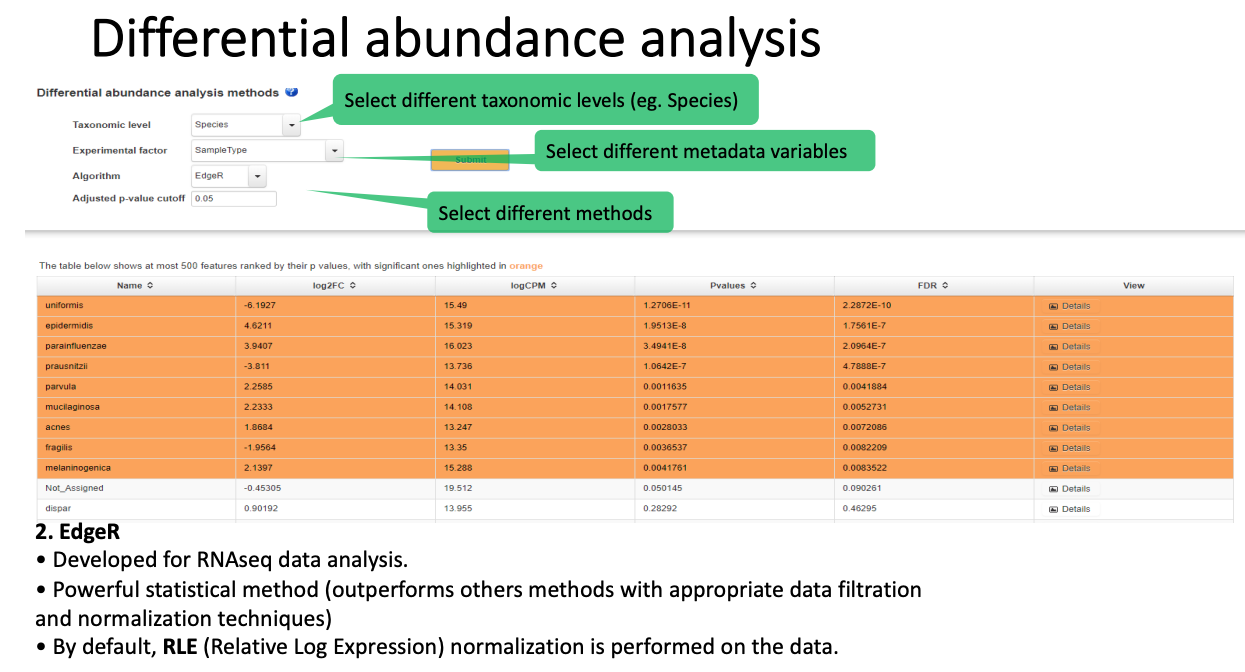

Try using the default values to find significant taxa:
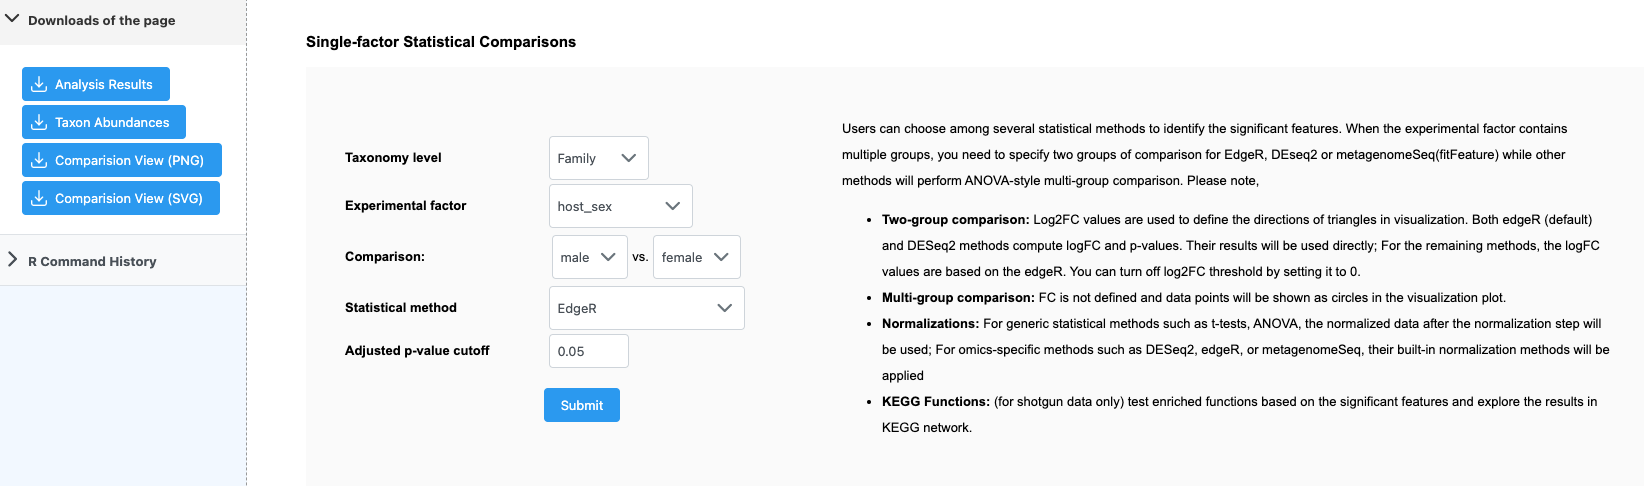

The bottom half of the page contains a graphical summary and the results table for the analysis. Features in the table are ranked by their false-discovery rate (FDR)-adjusted P values, and those below the cutoff are highlighted in orange.


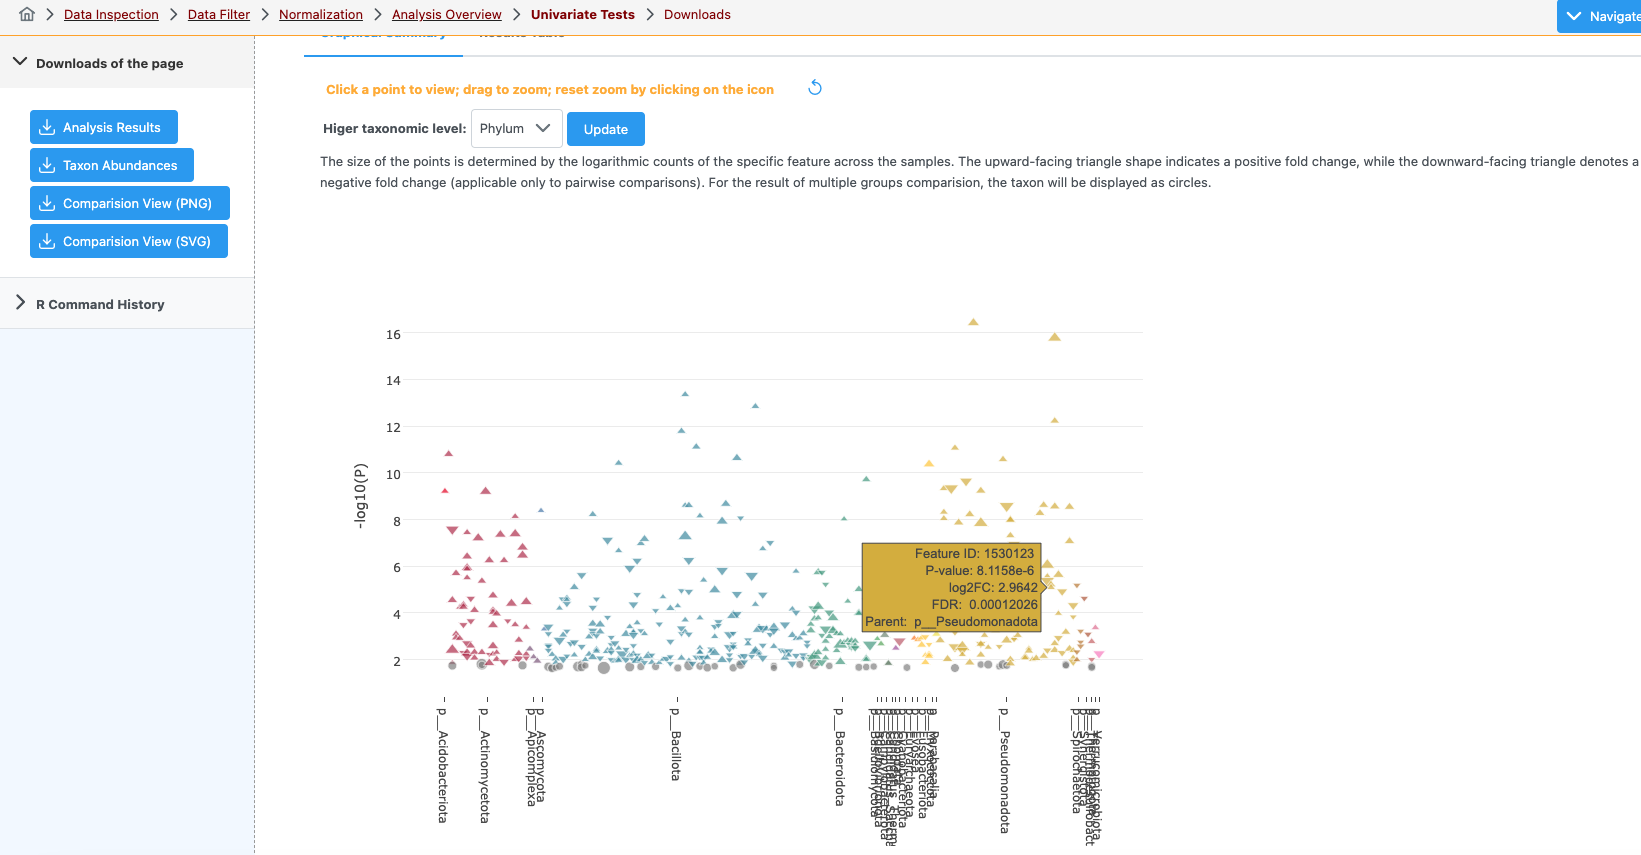


#### Check out the Results Table and Specific Features

Click the ‘Results Table’ link then click the ‘View’ column of the result table. A box plot will appear in a pop-up dialog, showing the abundances of the selected feature across different groups.

Explore the significant features identified at different taxonomic levels.

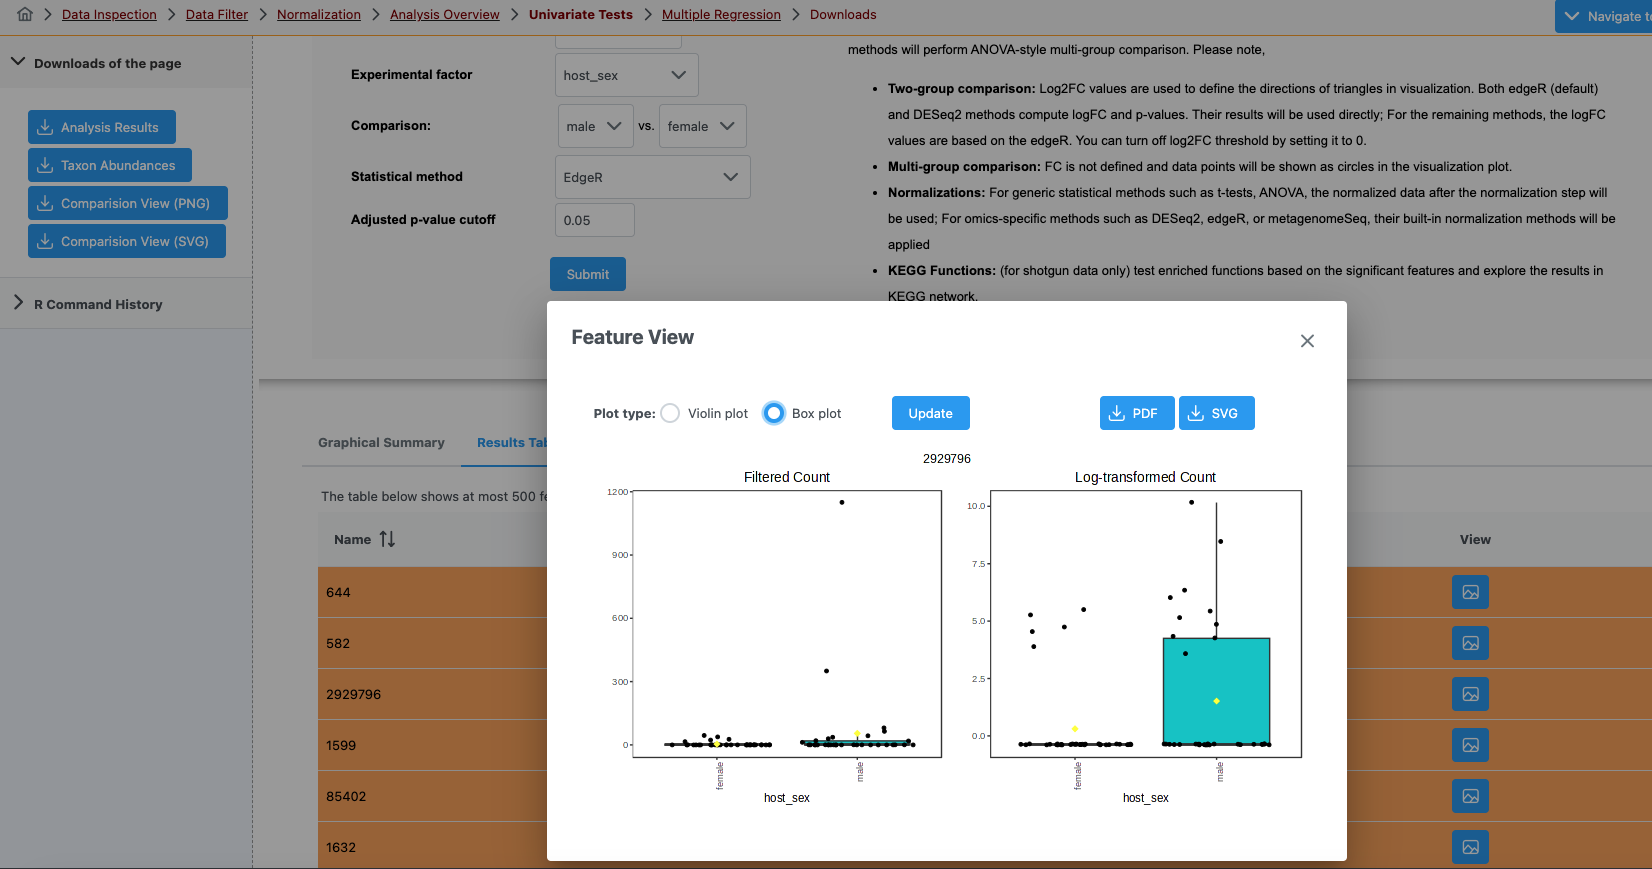

#### Step 2

Multiple Linear Regression with Covariate Adjustment

In the context of microbiome analysis, where the goal is often to examine how different covariates (e.g., environmental factors, host characteristics) influence microbial abundances or diversity, the choice of model depends on the characteristics of the data—especially the distribution of the count data (such as species abundances). Here’s a summary of differences for each model type, including how they differ from one another:

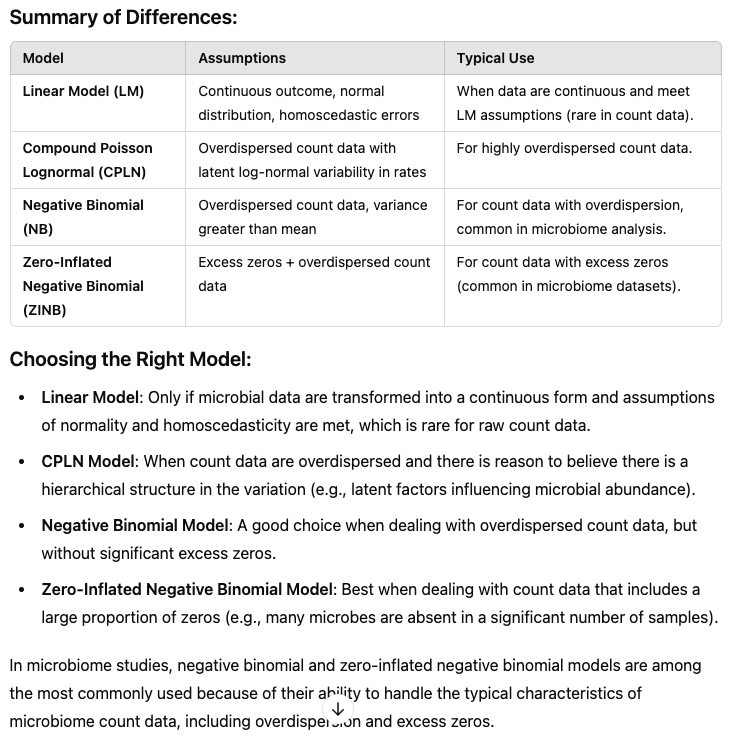



> ## Exercise: Multiple linear regression with covariates Exploration
> Use multiple regression to find differences in taxonomic abundance between male vs female babies. Try out each of the different models. For example, let's try the CPLN model that is useful when the count data exhibit overdispersion—i.e., the variance is much larger than the mean, which is common in microbiome datasets.

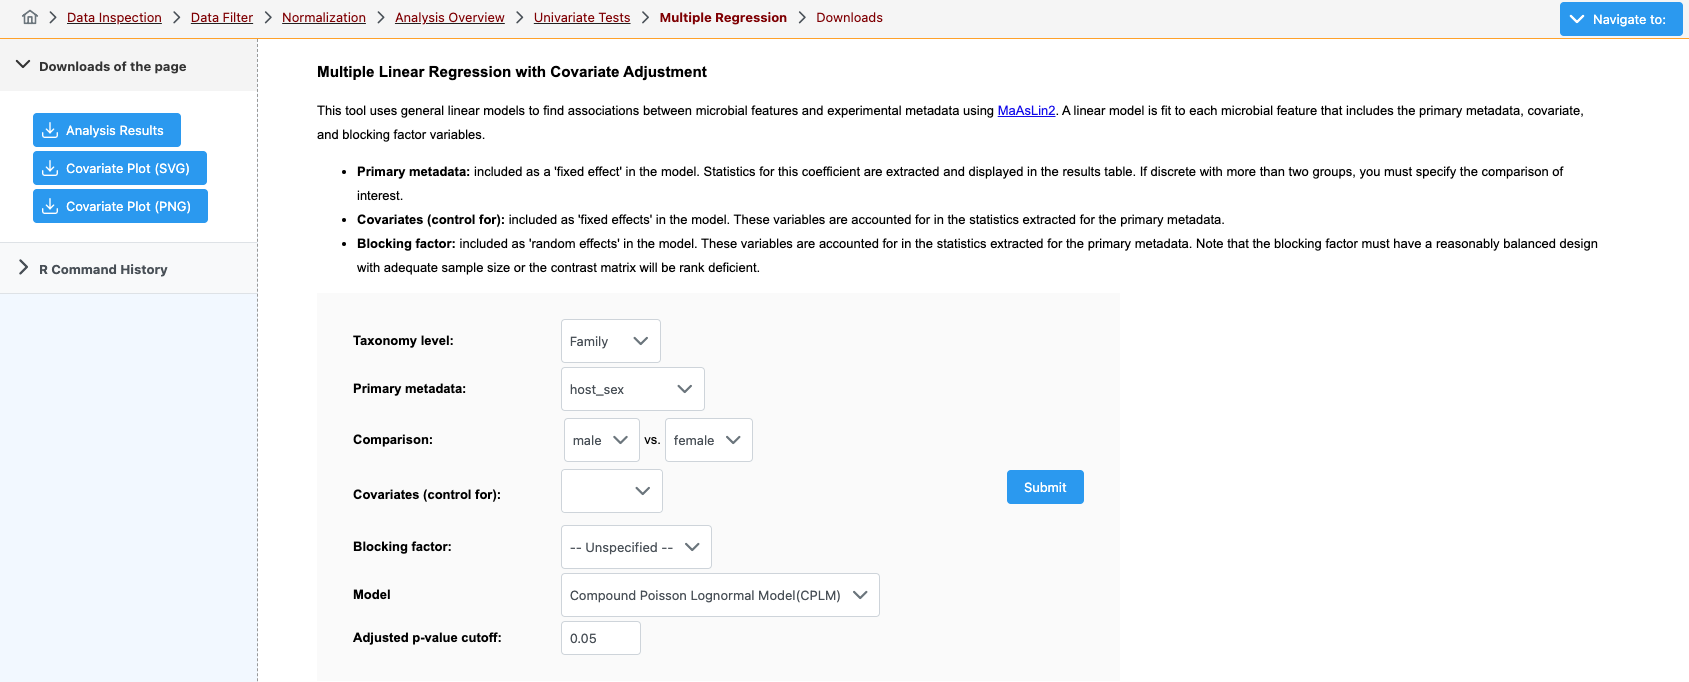

> You should see three significant factors:

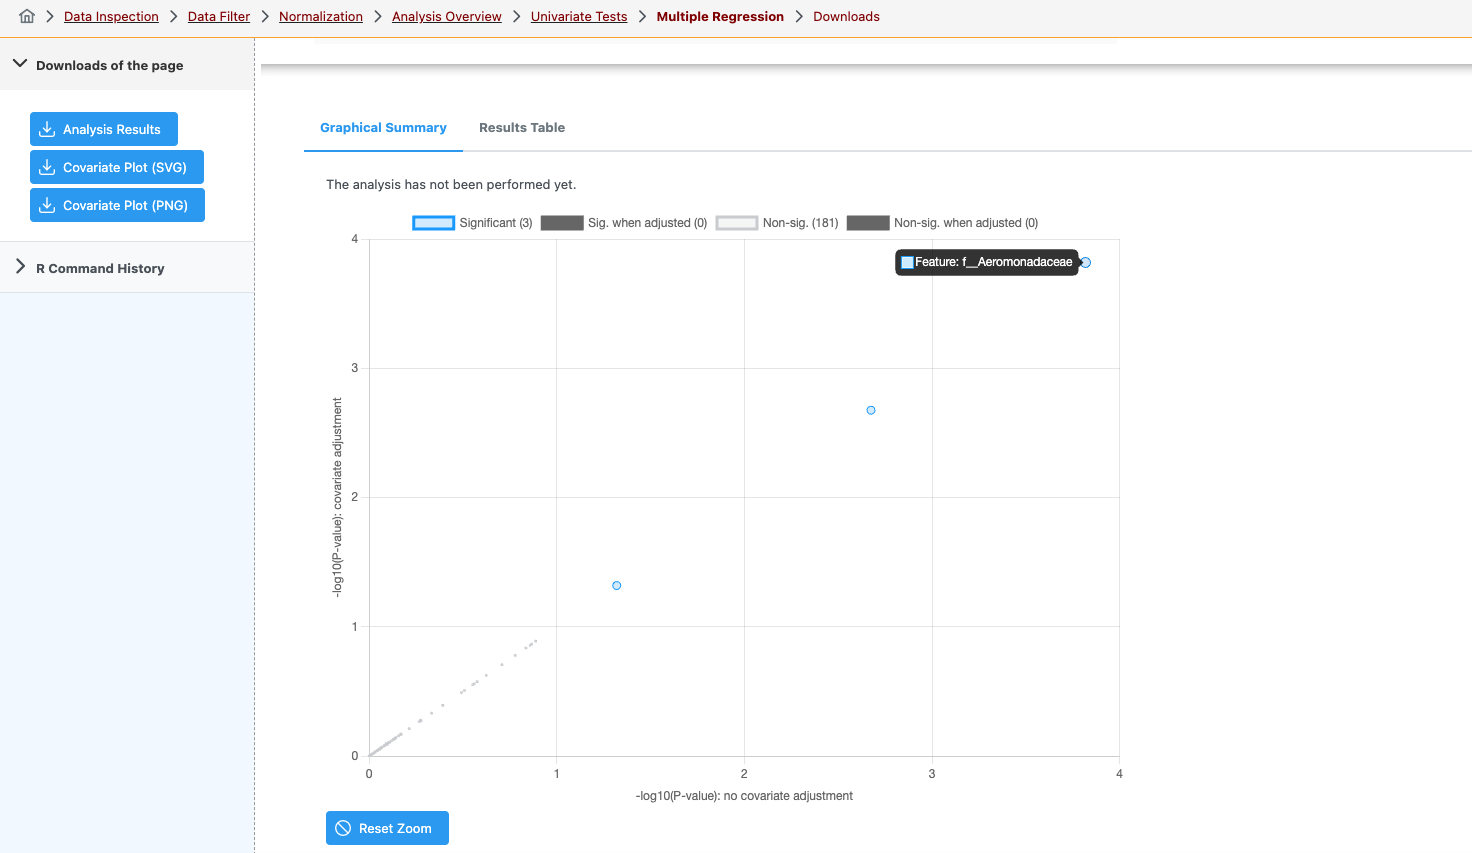

> Be sure to try negative binomial and zero-inflated negative binomial models that are most commonly used because of their ability to handle the typical characteristics of microbiome count data, including overdispersion and excess zeros.

#### Step 3

Biomarker discovery with linear discriminant analysis effect size (LEfSe).

Next, we will identify robust biomarkers using the LEfSe approach. Linear Discriminant Analysis Effect Size (LEfSe) is a statistical method used for biomarker discovery and identification of features that are significantly different between classes (e.g., different groups, treatments, or conditions) in microbiome and other omics data. It aims to identify both the features (e.g., taxa, genes, metabolites) that discriminate between classes and to estimate the strength of the discriminative effect of these features.

Key Outputs of LEfSe:
* Biomarker Identification: Features that are differentially abundant between the groups, with associated LDA scores and p-values.
* Effect Size: The LDA score, representing the effect size of each feature in class discrimination.
* Visualizations: Cladograms (for microbiome data), bar charts, and other plots that help users interpret the significance and effect sizes of biomarkers.


> ## Exercise: Biomarker discovery with LEfSe Exploration
> Return to the ‘Analysis Overview’ page and click ‘LEfSe’. The top half contains analysis parameters, whereas the bottom contains two tabs. The first tab is a graphical summary of the LEfSe results, whereas the second tab displays the results table. From the parameter panel, change the taxonomic level to ‘Genus’, the significance cutoff to ‘0.1’ (FDR-adjusted) and click ‘Submit’.

> Do you get any significant features? By default, the graphical output shows a dot plot containing at most the top 15 features ranked by their LDA scores.

> Go to the results table and check out a few of the features using the feature view:

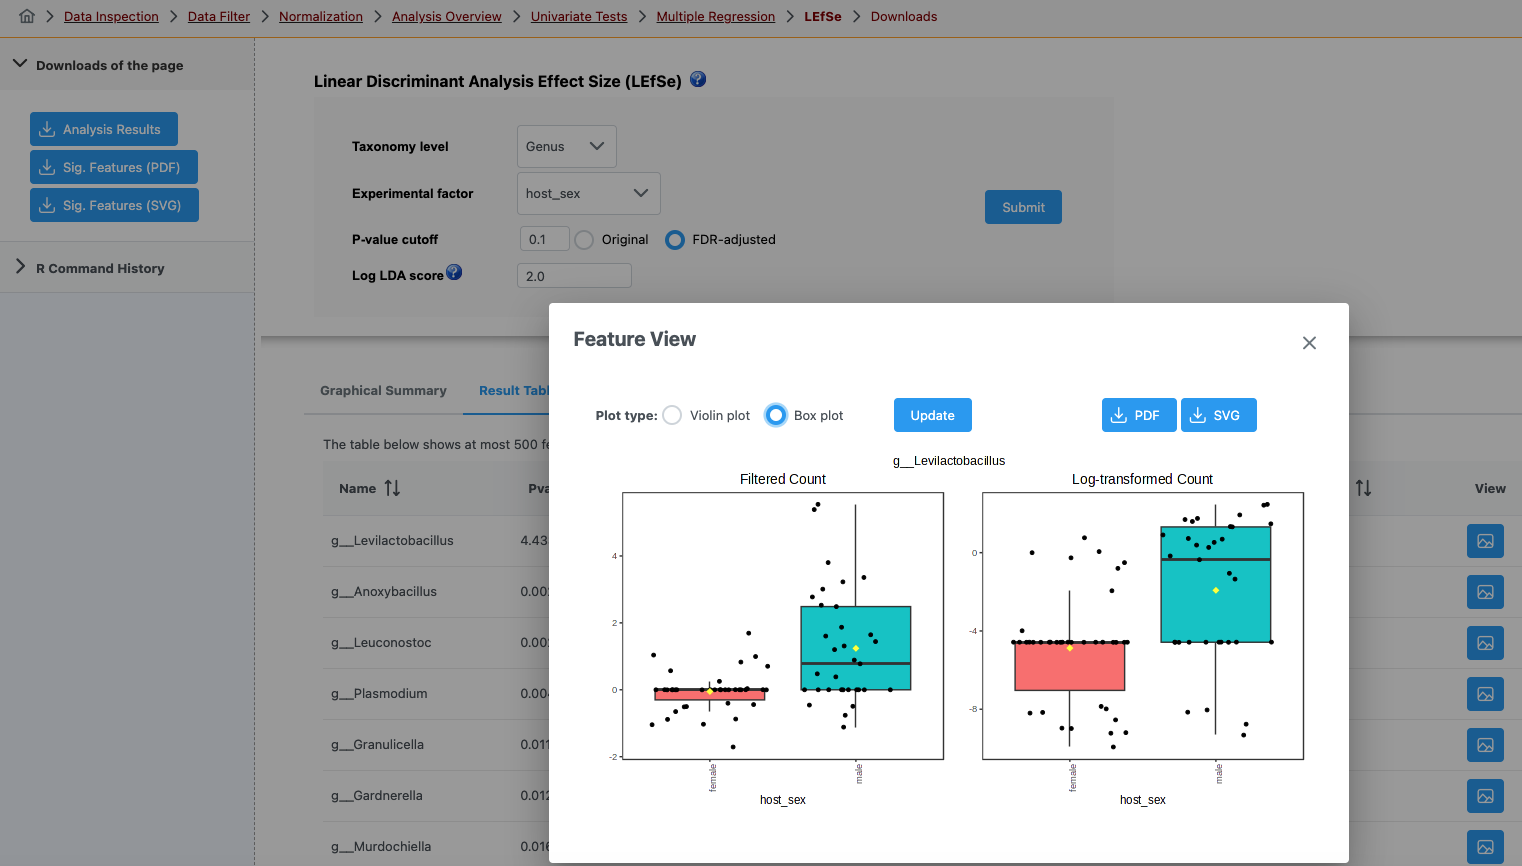



#### Step 4

Classification using ‘Random Forests’ 



> ## Exercise: Identification of significant features with RF
> From the ‘Analysis Overview’ page, click ‘Random Forests’. The random forests (RF) algorithm is a powerful machine-learning method that can be applied to microbiome data for classification and selection of important features. 

> By default, the RF model is created using 500 trees. Use the drop-down menu to set this to ‘5000’, set the ‘Taxonomic level’ to ‘Genus’, and click ‘Submit’. 

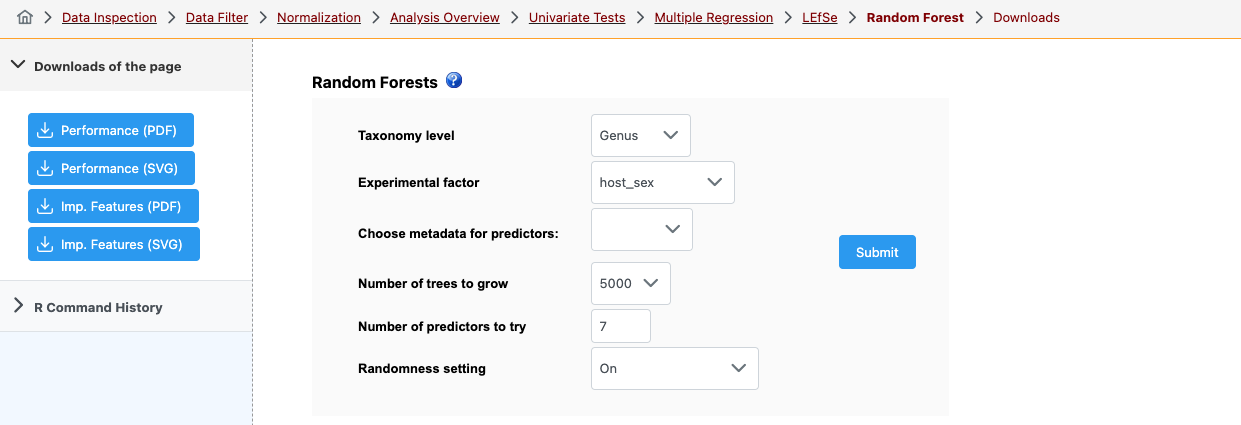


> From the ‘Classification Performance’ tab, the out-of-bag (OOB) error using 5,000 trees is 0.394. This value may be different for some users because of the randomness of the algorithm. The plot shows the performance of the RF model, trained on genus-level data, in predicting the sample classification to either male or female. RF can naturally deal with multiclass datasets and will compute OOB errors and classification performance for each group.

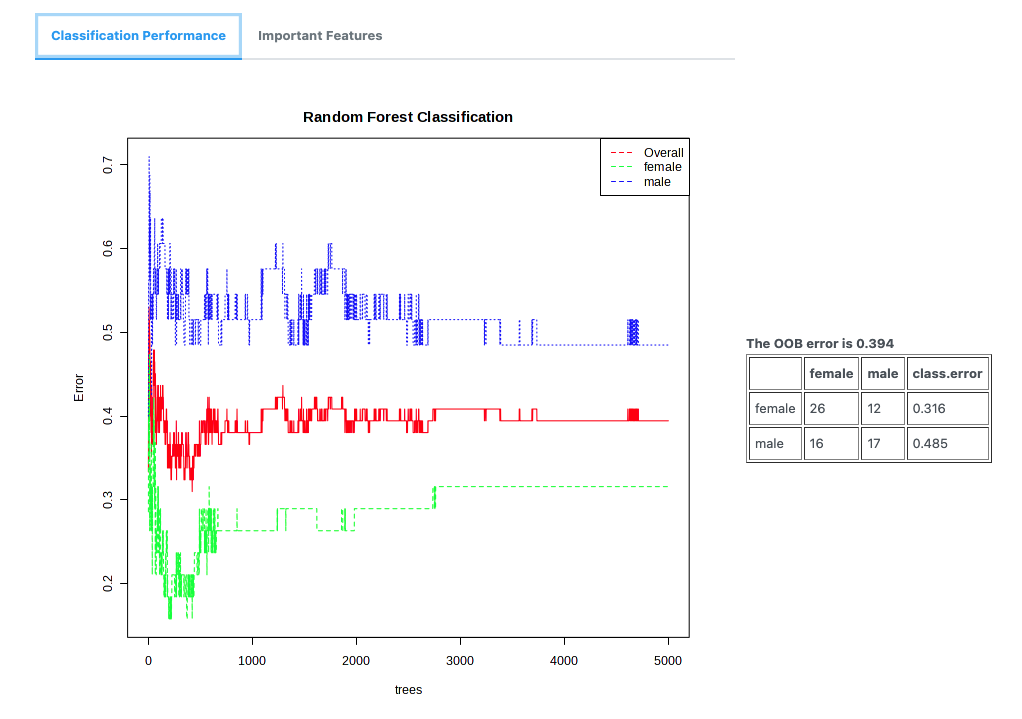


> Click the ‘Important Features’ tab to view the graphical result. The plot layout is identical to that of the LEfSe plot (see above)), except that features are ranked by their mean decrease accuracy. For multiclass datasets, the mini heatmap helps visualize the patterns of change across different groups. Using RF, Levilactobacillus and Plasmodium are identified as the most important differences between male and female babies, marked by a decreased abundance in females.

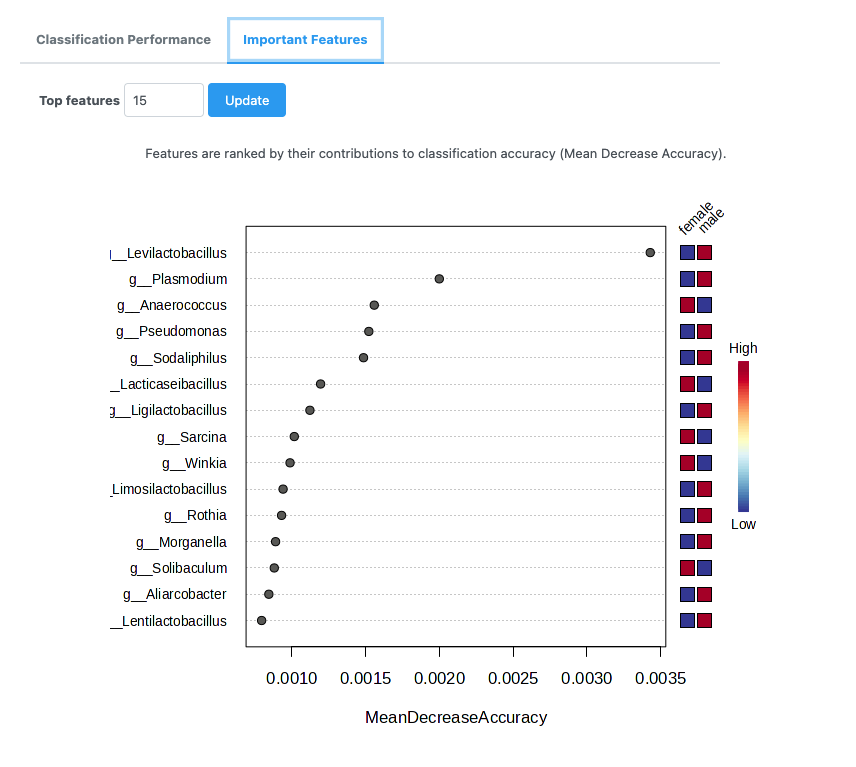

> ## Discussion: Identification of significant taxa with respect to sex
> The higher abundance of Levilactobacillus and Plasmodium in the male infant gut microbiome that we see in the Exercise above using RF could be due to a combination of sex-related differences in immune responses, hormonal influences, and ecological interactions in the gut environment. 

> Do you believe these results? Are these same taxa also popping up and being differentially abundant in other analyses? How might you decide on which of these tests you can believe?

## The End

Copy your notebook for future reference...

In [ ]:
!cp ~/be487-fall-2024/exercises/15_comparisons/ex15_comparisons.ipynb $work_dir